# Opening the Intake Catalog

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import intake

We can load the catalog file with `intake.open_catalog()`. The catalog contains the information needed to access the data for each field in the dataset. You can get a list of the different fields in the dataset with `list()`.

In [2]:
dset = "darwin_v0_2_cs510"
#catalog = intake.open_catalog("catalog/"+dset + '.yml')
#catalog = intake.open_catalog("intake://localhost:5000")
catalog = intake.open_catalog("darwin_v0.2_cs510.yml")
# catalog = catalog[dset]
fldnames = list(catalog)
print(fldnames[0:5])

['ChlTotal', 'Cocco', 'DIN', 'Denit', 'Diatom']


# Retrieving and Plotting Data

We'll pick a field, c01 concentration. Each entry in the catalog can be accessed like a dictionary, with the field name as the key. Then we can get some basic information and metadata about this field with the `describe()` function.

In [3]:
fldname = "TRAC21" # c01 concentration
catalog_entry = catalog[fldname]

catalog_entry.describe()

{'name': 'TRAC21',
 'container': 'xarray',
 'plugin': ['opendap'],
 'driver': ['opendap'],
 'description': '',
 'direct_access': 'allow',
 'user_parameters': [],
 'metadata': {'A': 'Product identifier: a `cs510` model run by `jahn@mit.edu`',
  'Conventions': 'CF-1.6',
  'DODS_EXTRA.Unlimited_Dimension': 'time',
  'NCTiles': '0.1.9',
  '_FillValue': nan,
  'category': 'PlanktonBiomass',
  'coords': ('lon_c', 'lat_c', 'dep_c', 'time'),
  'data_vars': {'TRAC21': ['lon_c', 'lat_c', 'dep_c', 'time']},
  'date': '10-Aug-2020',
  'description': 'TRAC21 -- This product has been provided by the Simons Collaboration on Computational Biogeochemical Modeling of Marine Ecosystems (https://cbiomes.org/)',
  'dims': {'dep_c': 50, 'lat_c': 1080, 'lon_c': 2160, 'time': 2679},
  'itile': 1.0,
  'long_name': 'c01 concentration',
  'missing_value': nan,
  'ntile': 1.0,
  'units': 'mmol C/m^3'},
 'args': {'urlpath': 'http://engaging-opendap.mit.edu:8080/thredds/dodsC/nese/darwin_v0.2_cs510/PlanktonBiomass/

Once we load the catalog we can use the `read_chunked()` function on a catalog entry to read in a particular field. At this point we have an xarray `DataArray` object.

Then you can create variables that point to the data on OpenDap. This does not download data at this point. Data is only downloaded when you specify a "slice".

In [4]:
# Access the file
dataset = catalog_entry.read_chunked()

# Dimensions and Variable
time = dataset["time"]
depth = dataset["dep_c"]
lat = dataset["lat_c"]
lon = dataset["lon_c"]
TRAC21 = dataset["TRAC21"]

# See what this looks like
TRAC21

<xarray.DataArray 'TRAC21' (time: 2679, dep_c: 50, lat_c: 1080, lon_c: 2160)>
[312478560000 values with dtype=float32]
Coordinates:
  * lon_c    (lon_c) float64 -179.9 -179.8 -179.6 -179.4 ... 179.6 179.8 179.9
  * lat_c    (lat_c) float64 -89.92 -89.75 -89.58 -89.42 ... 89.58 89.75 89.92
  * dep_c    (dep_c) float64 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
  * time     (time) datetime64[ns] 1993-12-31T12:00:00 ... 2015-12-30T12:00:00
Attributes:
    long_name:    c01 concentration
    units:        mmol C/m^3
    _ChunkSizes:  [1, 9, 216, 432]

In [18]:
TRAC21.long_name

'c01 concentration'

We can look at the attributes of a variable and get the individual attributes of a variable. We can also find out how many elements a variable has and its shape.

In [5]:
# Attributes of variables
print("Attributes of c01: " + str(TRAC21.attrs))

# Get a particular attribute
print('\n' + "Units of depth: " + depth.attrs["units"] + '\n')
# or depth.units also works

# Inspect size and shape
print("c01 has " + str(TRAC21.size) + " elements and a shape of " + str(TRAC21.shape))

Attributes of c01: {'long_name': 'c01 concentration', 'units': 'mmol C/m^3', '_ChunkSizes': [1, 9, 216, 432]}

Units of depth: m

c01 has 312478560000 elements and a shape of (2679, 50, 1080, 2160)


When you request a slice of data it will be downloaded. Let's look at the surface of the 500th time step.

In [6]:
t = 500; d = 0;
TRAC21_data = TRAC21[t,d,:,:].data

TRAC21_data

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [1.72604188e-17, 1.72601988e-17, 1.72598994e-17, ...,
        1.78146232e-17, 1.78149690e-17, 1.78151576e-17],
       [1.23494475e-17, 1.23493078e-17, 1.23491431e-17, ...,
        1.25441204e-17, 1.25442916e-17, 1.25444157e-17],
       [8.51455138e-18, 8.51438594e-18, 8.51428337e-18, ...,
        9.20249764e-18, 9.20258201e-18, 9.20269616e-18]], dtype=float32)

Let's plot some things!

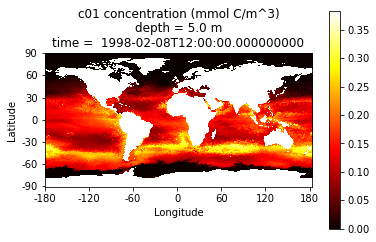

In [7]:
lat_ticks = np.arange(90, -91, step=-30)
lon_ticks = np.arange(-180, 181, step=60)
title_txt = '\ndepth = ' + str(depth[d].data) + ' ' + depth.units  + '\ntime =  '+ str(time[t].data)

a = np.flipud(TRAC21_data.reshape(TRAC21_data.shape[0],TRAC21_data.shape[1]))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(0,TRAC21_data.shape[1],356),lon_ticks)
plt.yticks(np.arange(0,TRAC21_data.shape[0],179),lat_ticks)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(TRAC21.long_name +' (' + TRAC21.units + ')' + title_txt)
plt.show()

# Working with Data

To show how to work with the data, we'll show how to get the total phytoplankton concentration for a particular time and depth. Note this section takes a few minutes to run.

In [8]:
flds = ["TRAC"+str(n) for n in range(21,72)]
t = 500; d = 0;
import time as tm

In [9]:
start = tm.time()
dset = "darwin_v0.2_cs510"
f = "TRAC21" # c01 concentration
dataset = catalog[f].read_chunked()
thresh = .0000001

time = dataset["time"]
depth = dataset["dep_c"]

total_phyto = dataset[f][t,d,:,:].data
total_phyto[total_phyto == -9.9999998e+33] = np.nan
for f in flds[1:-1]:
    dataset = catalog[f].read_chunked()
    fld = dataset[f][t,d,:,:].data
    #fld[fld < thresh] = 0
    total_phyto = total_phyto + fld

end = tm.time()
print ("Time elapsed:", end - start)

Time elapsed: 269.90907979011536


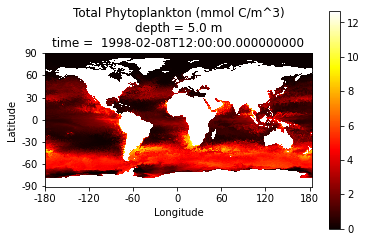

In [10]:
lat_ticks = np.arange(90, -91, step=-30)
lon_ticks = np.arange(-180, 181, step=60)
title_txt = '\ndepth = ' + str(depth[d].data) + ' ' + depth.units  + '\ntime =  '+ str(time[t].data)

a = np.flipud(total_phyto.reshape(total_phyto.shape[0],total_phyto.shape[1]))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(0,total_phyto.shape[1],356),lon_ticks)
plt.yticks(np.arange(0,total_phyto.shape[0],179),lat_ticks)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Phytoplankton (' + TRAC21.units + ')' + title_txt)
plt.show()